In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==1.14

# required libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers import RNN, LSTM, GRU, SimpleRNN
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

root = "/content/drive/My Drive/project/"

print(tf.__version__)

2.2.0-rc3


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
class My_Generator(keras.utils.Sequence) :
  
  def __init__(self) :
    self.root = "/content/drive/My Drive/project/"
  
  def __getitem__(self, idx) :
    current = idx+1
    batch_x = np.load(root+"batch"+str(current)+".npy", allow_pickle=True) 
    batch_y = np.load(root+"batch"+str(current)+"_y.npy", allow_pickle=True)
    return batch_x, batch_y

  def __len__(self) :
    return 10
    


#training generator

train_gen = My_Generator()

#validation data

val_x = np.load(root+"test.npy")
val_y = np.load(root+"test_y.npy")

In [ ]:
#model

model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = (7), activation ='relu',input_shape=(1366, 96)))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Dropout(0.25))

model.add(Conv1D(filters = 128, kernel_size = (7), activation ='relu'))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Dropout(0.25))

model.add(Conv1D(filters = 256, kernel_size = (7), activation ='relu'))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(134, activation = "sigmoid"))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1360, 64)          43072     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 453, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 453, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 447, 128)          57472     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 149, 128)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 149, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 143, 256)         

In [ ]:
#filepath= root+"weights_best.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

#model.load_weights(root+"weights_best.hdf5")
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #necessary
#print("Created model and loaded weights from file")

#fit the model
history = model.fit_generator(generator=train_gen,
                   steps_per_epoch = 10,
                   epochs = 10,
                   verbose = 1,
                   validation_data = (val_x, val_y))
                   #, callbacks=callbacks_list)


Epoch 1/10
10/10 [==============================] - 126s 13s/step - loss: 0.8015 - accuracy: 0.5056 - val_loss: 0.8017 - val_accuracy: 0.5766
Epoch 2/10
10/10 [==============================] - 40s 4s/step - loss: 0.7481 - accuracy: 0.5354 - val_loss: 0.6796 - val_accuracy: 0.6583
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 0.7177 - accuracy: 0.5814 - val_loss: 0.6182 - val_accuracy: 0.8027
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 0.6741 - accuracy: 0.6540 - val_loss: 0.5591 - val_accuracy: 0.9339
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.6101 - accuracy: 0.7472 - val_loss: 0.4842 - val_accuracy: 0.9665
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 0.5295 - accuracy: 0.8376 - val_loss: 0.3990 - val_accuracy: 0.9746
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 0.4361 - accuracy: 0.9039 - val_loss: 0.3181 - val_accuracy: 0.9765
Epoch 8/10
10/10 [

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


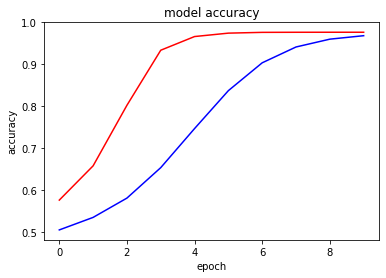

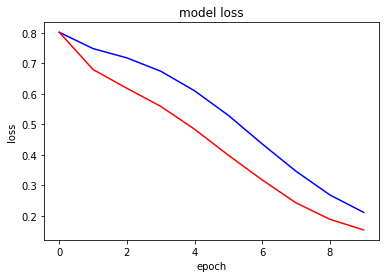

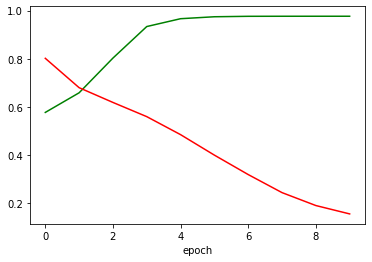

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'], 'g')
plt.plot(history.history['val_loss'], 'r')
plt.xlabel('epoch')
plt.show()



In [ ]:
#model2

model2 = Sequential()

model2.add(GRU(128,return_sequences = True, input_shape=(1366, 96)))
model2.add(Dropout(0.25))

model2.add(GRU(64, return_sequences = True))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(64, activation = "relu")) #Fully connected layer
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(134, activation = "sigmoid"))

model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1366, 128)         86400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1366, 128)         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1366, 64)          37056     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1366, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87424)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                5595200   
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)               

In [ ]:
#fit the model
from time import time
start = time()
history = model2.fit_generator(generator=train_gen,
                   #steps_per_epoch = 10,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (val_x, val_y))
                   #, callbacks=callbacks_list)
end = time()
total_time = end-start
print(total_time)

Epoch 1/25
10/10 [==============================] - 191s 19s/step - loss: 0.8060 - accuracy: 0.5044 - val_loss: 1.4905 - val_accuracy: 0.5388
Epoch 2/25
10/10 [==============================] - 179s 18s/step - loss: 0.7571 - accuracy: 0.5145 - val_loss: 1.1427 - val_accuracy: 0.5129
Epoch 3/25
10/10 [==============================] - 180s 18s/step - loss: 0.7325 - accuracy: 0.5252 - val_loss: 1.0568 - val_accuracy: 0.5123
Epoch 4/25
10/10 [==============================] - 181s 18s/step - loss: 0.7139 - accuracy: 0.5377 - val_loss: 0.9366 - val_accuracy: 0.5011
Epoch 5/25
10/10 [==============================] - 181s 18s/step - loss: 0.6980 - accuracy: 0.5566 - val_loss: 0.8254 - val_accuracy: 0.5154
Epoch 6/25
10/10 [==============================] - 177s 18s/step - loss: 0.6807 - accuracy: 0.5841 - val_loss: 0.7246 - val_accuracy: 0.5612
Epoch 7/25
10/10 [==============================] - 181s 18s/step - loss: 0.6554 - accuracy: 0.6256 - val_loss: 0.6652 - val_accuracy: 0.6065
Epoch 

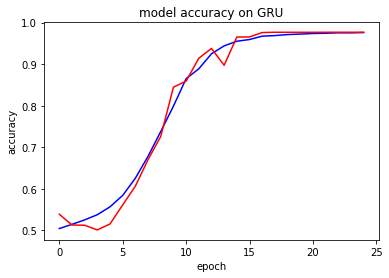

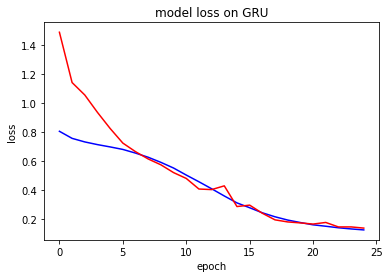

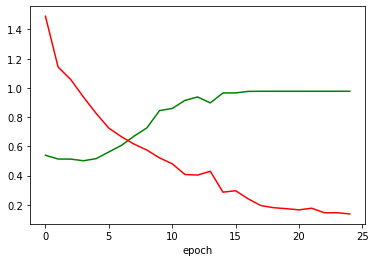

In [ ]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy on GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss on GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'], 'g')
plt.plot(history.history['val_loss'], 'r')
plt.xlabel('epoch')
plt.show()

In [ ]:
model3 = Sequential()

model3.add(LSTM(128,return_sequences = True, input_shape=(1366, 96)))
model3.add(Dropout(0.25))

model3.add(LSTM(64, return_sequences = True))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(64, activation = "relu")) #Fully connected layer
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(134, activation = "sigmoid"))

model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1366, 128)         115200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1366, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1366, 64)          49408     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1366, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87424)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                5595200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)               

In [ ]:
#fit the model
from time import time
start = time()
history = model3.fit_generator(generator=train_gen,
                   #steps_per_epoch = 10,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (val_x, val_y))
                   #, callbacks=callbacks_list)
end = time()
total_time = end-start
print(total_time)

Epoch 1/25
10/10 [==============================] - 189s 19s/step - loss: 0.7797 - accuracy: 0.5055 - val_loss: 1.1949 - val_accuracy: 0.5515
Epoch 2/25
10/10 [==============================] - 184s 18s/step - loss: 0.7151 - accuracy: 0.5227 - val_loss: 1.3833 - val_accuracy: 0.5521
Epoch 3/25
10/10 [==============================] - 180s 18s/step - loss: 0.6951 - accuracy: 0.5432 - val_loss: 0.8560 - val_accuracy: 0.5793
Epoch 4/25
10/10 [==============================] - 186s 19s/step - loss: 0.6786 - accuracy: 0.5815 - val_loss: 0.7006 - val_accuracy: 0.6429
Epoch 5/25
10/10 [==============================] - 182s 18s/step - loss: 0.6596 - accuracy: 0.6374 - val_loss: 0.6286 - val_accuracy: 0.6872
Epoch 6/25
10/10 [==============================] - 184s 18s/step - loss: 0.6328 - accuracy: 0.7047 - val_loss: 0.5716 - val_accuracy: 0.7380
Epoch 7/25
10/10 [==============================] - 181s 18s/step - loss: 0.5990 - accuracy: 0.7851 - val_loss: 0.5245 - val_accuracy: 0.7904
Epoch 

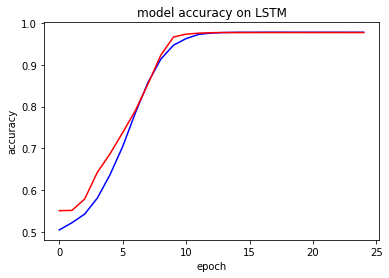

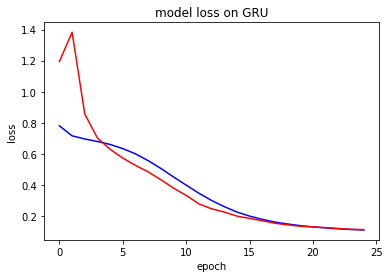

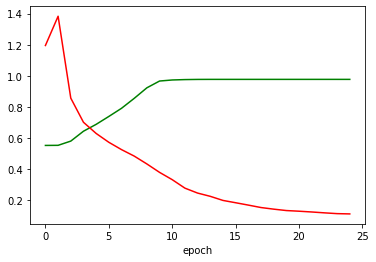

In [ ]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy on LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss on GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'], 'g')
plt.plot(history.history['val_loss'], 'r')
plt.xlabel('epoch')
plt.show()

In [ ]:
model4 = Sequential()

model4.add(LSTM(128,return_sequences = True, input_shape=(1366, 96)))
model4.add(Dropout(0.25))

model4.add(Conv1D(filters = 64, kernel_size = (7), activation ='relu'))
model4.add(MaxPooling1D(pool_size=(3)))
model4.add(Dropout(0.25))

model4.add(Flatten())

model4.add(Dense(64, activation = "relu")) #Fully connected layer
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(134, activation = "sigmoid"))

model4.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1366, 128)         115200    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1366, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1360, 64)          57408     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 453, 64)           0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 453, 64)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28992)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
from time import time
start = time()
history = model4.fit_generator(generator=train_gen,
                   #steps_per_epoch = 10,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (val_x, val_y))
                   #, callbacks=callbacks_list)
end = time()
total_time = end-start
print(total_time)

Epoch 1/25
10/10 [==============================] - 123s 12s/step - loss: 0.7501 - accuracy: 0.5016 - val_loss: 1.5078 - val_accuracy: 0.4860
Epoch 2/25
10/10 [==============================] - 117s 12s/step - loss: 0.7148 - accuracy: 0.5167 - val_loss: 0.9700 - val_accuracy: 0.4988
Epoch 3/25
10/10 [==============================] - 113s 11s/step - loss: 0.6980 - accuracy: 0.5413 - val_loss: 0.8030 - val_accuracy: 0.5015
Epoch 4/25
10/10 [==============================] - 130s 13s/step - loss: 0.6786 - accuracy: 0.5765 - val_loss: 0.6989 - val_accuracy: 0.5399
Epoch 5/25
10/10 [==============================] - 115s 11s/step - loss: 0.6538 - accuracy: 0.6286 - val_loss: 0.6418 - val_accuracy: 0.6430
Epoch 6/25
10/10 [==============================] - 120s 12s/step - loss: 0.6224 - accuracy: 0.6979 - val_loss: 0.5972 - val_accuracy: 0.7569
Epoch 7/25
10/10 [==============================] - 118s 12s/step - loss: 0.5832 - accuracy: 0.7752 - val_loss: 0.5477 - val_accuracy: 0.8868
Epoch 

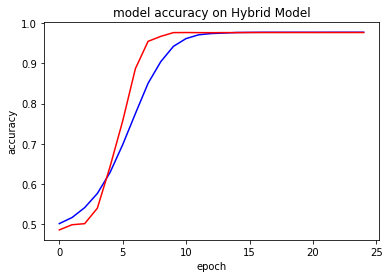

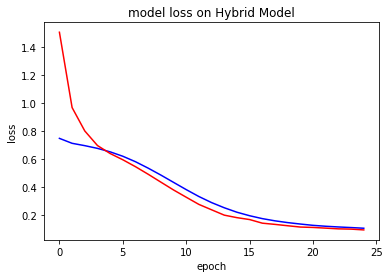

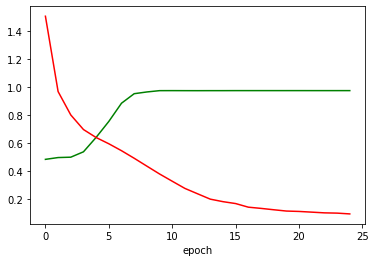

In [ ]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy on Hybrid Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss on Hybrid Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'], 'g')
plt.plot(history.history['val_loss'], 'r')
plt.xlabel('epoch')
plt.show()